In [184]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score


In [185]:
#dataset downloaded from kaggle the dataset is Credit card fraud detection 2023
credit_data = pd.read_csv("creditcard_2023.csv")
credit_data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [186]:
#In 'Class column' there's two value 0 and 1 , whereas 1 means fraudulent and 0 means non-fraudelent
# distributing legit transactions and fraudulent transactions

credit_data["Class"].value_counts()


0    284315
1    284315
Name: Class, dtype: int64

In [187]:
credit_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [188]:
# Informations about the data where includes non-value and their datatypes

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [189]:
# Checking if any missing value  
credit_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [190]:
#separating data 

legit = credit_data[credit_data.Class == 0] 
fraudulent = credit_data[credit_data.Class == 1]

#this dataset is include all legit transactions
print(" Total Legit Transcation: ", legit.shape )
#this dataset is include all fraudulent transactions
print(" Total Fraudulent Transcation: " , fraudulent.shape)

#Comparing both transaction values
credit_data.groupby('Class').mean()

 Total Legit Transcation:  (284315, 31)
 Total Fraudulent Transcation:  (284315, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


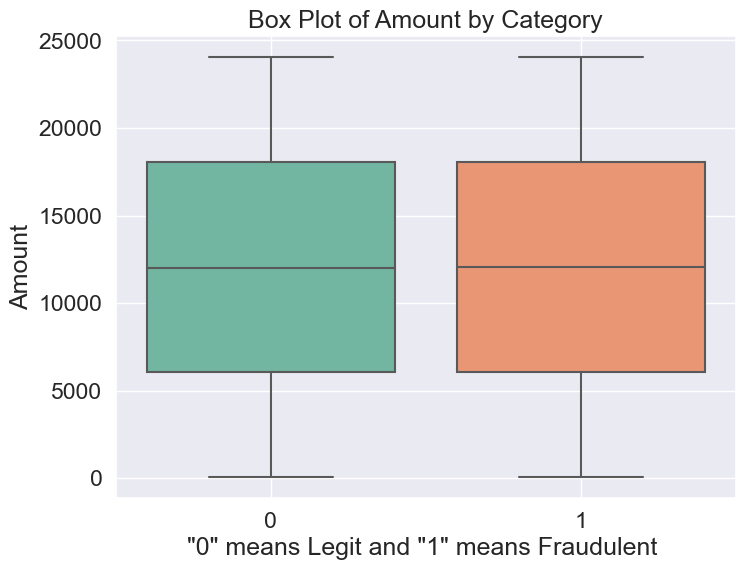

In [191]:
#Box plotting for both classes 
# 0 and 1 class ratio is 50:50
data = {
    'id': credit_data['id'],
    'amount': credit_data['Amount'],
    'category': credit_data['Class']
}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['category'], y=df['amount'], palette='Set2')
plt.xlabel('"0" means Legit and "1" means Fraudulent ' )
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Category')
plt.grid(True)
plt.show()


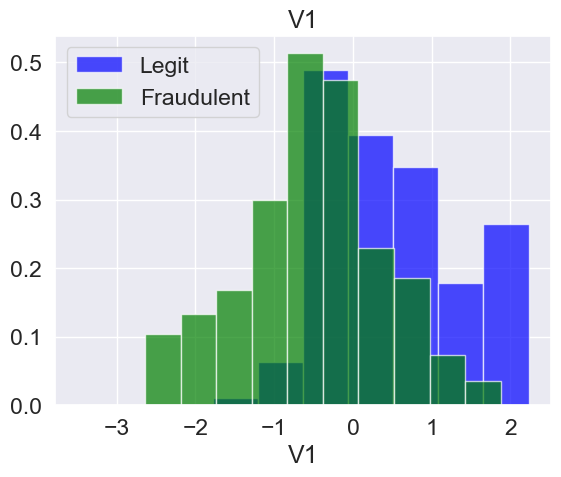

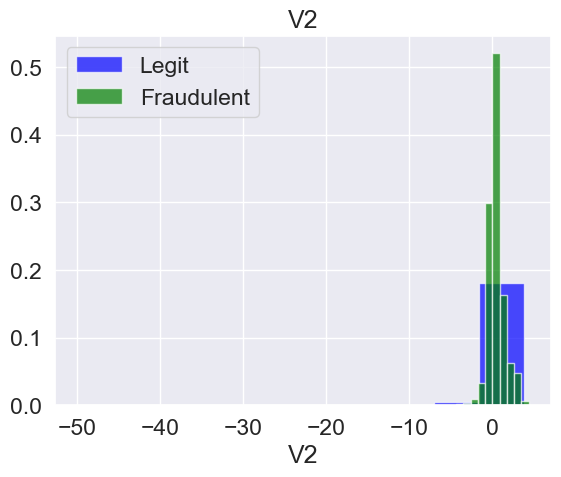

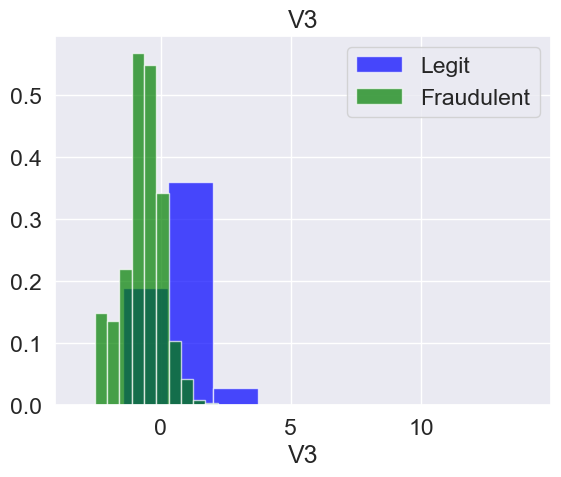

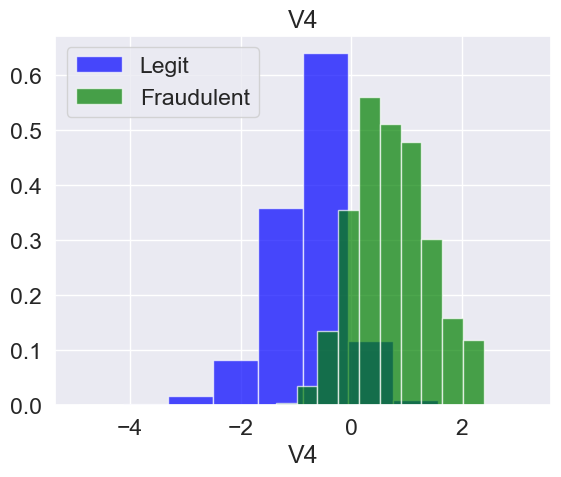

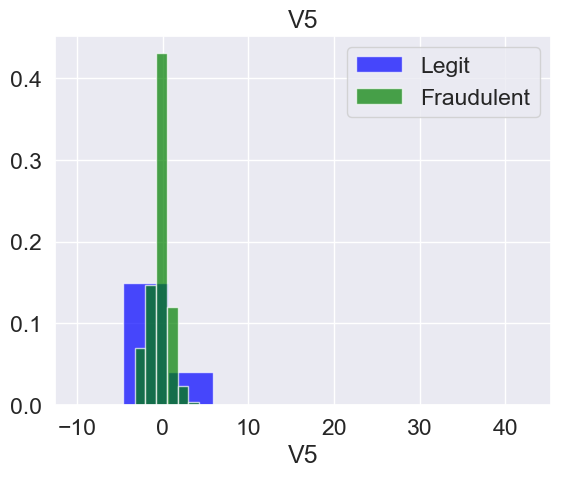

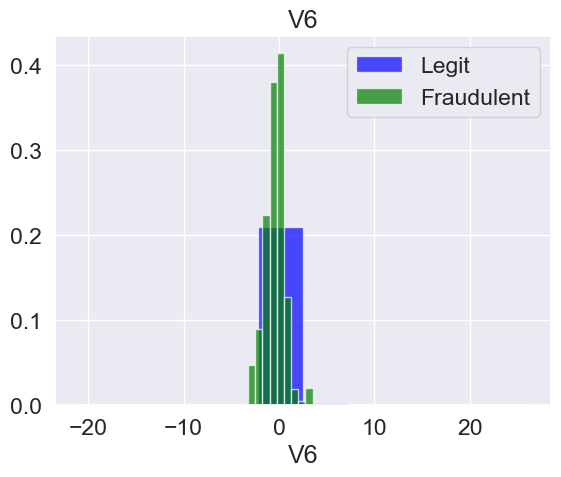

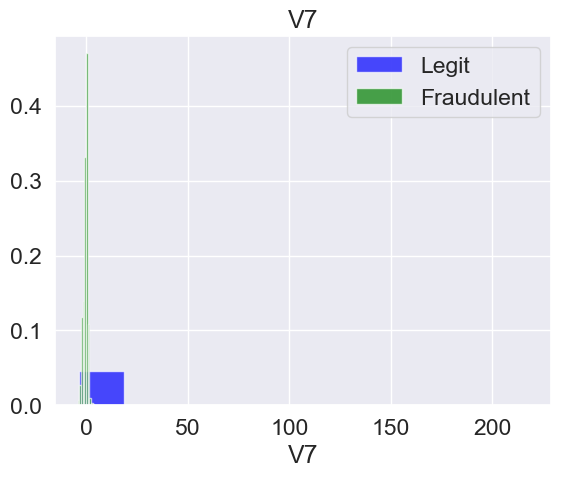

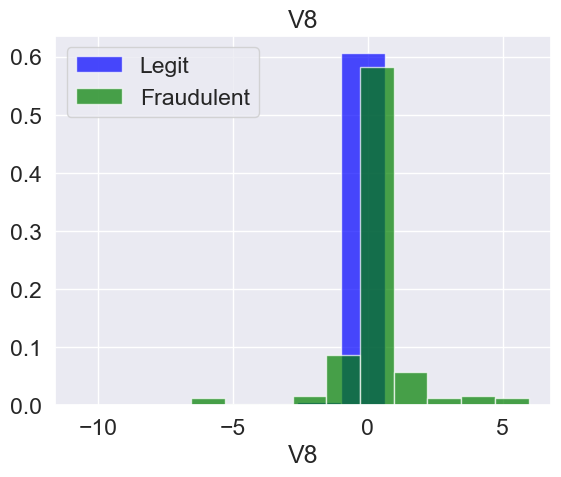

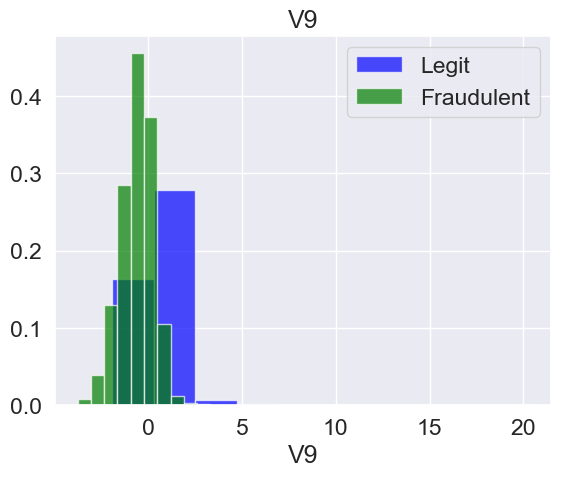

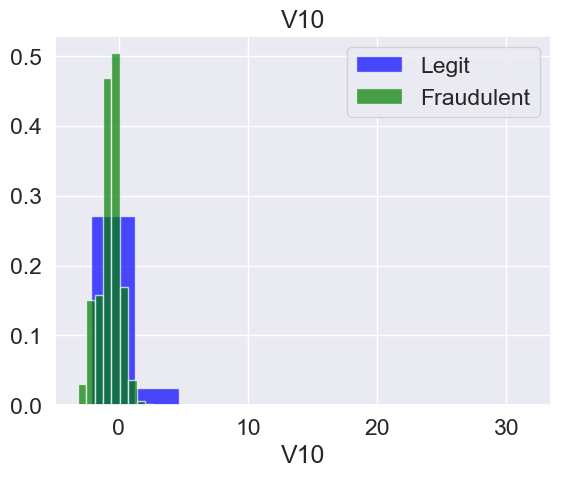

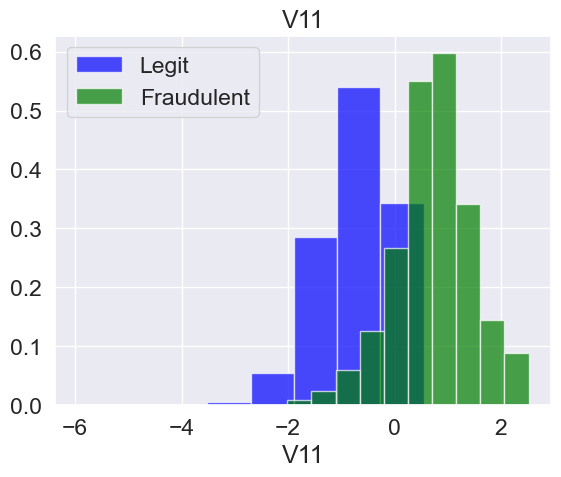

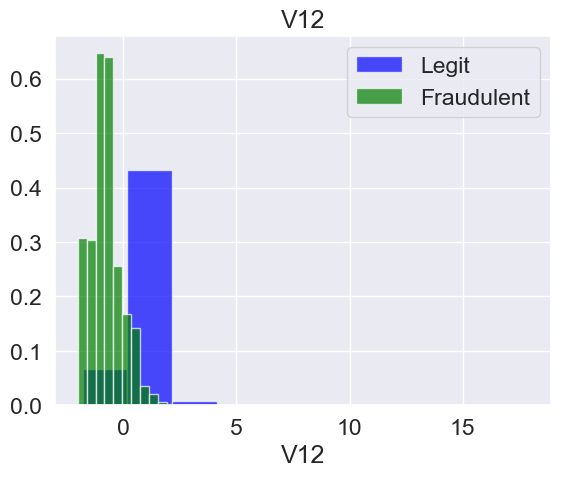

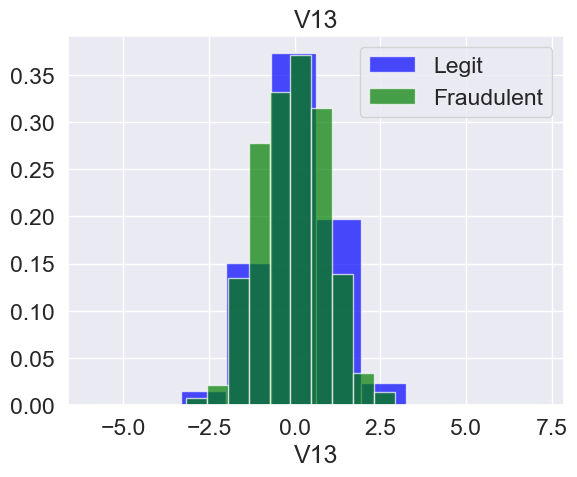

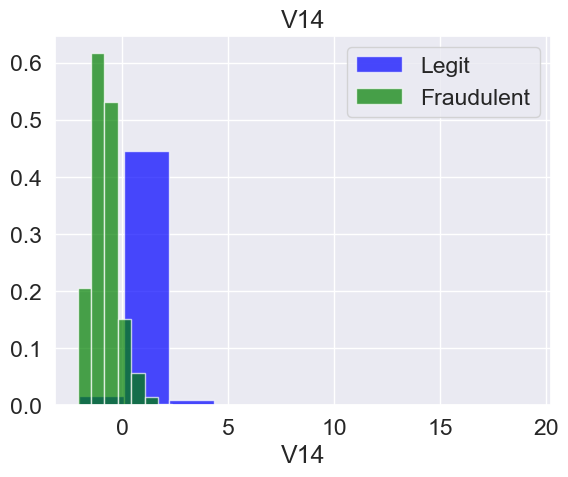

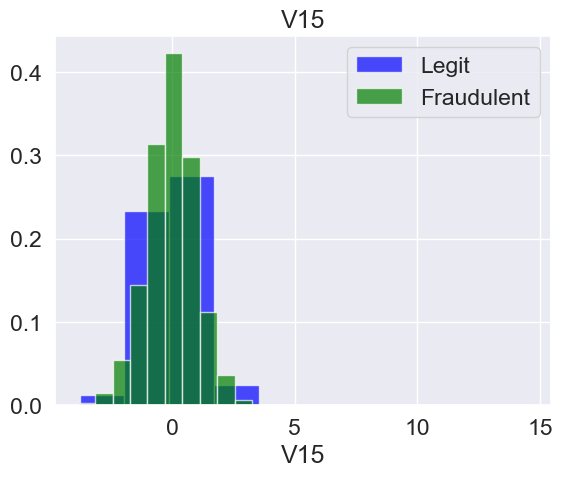

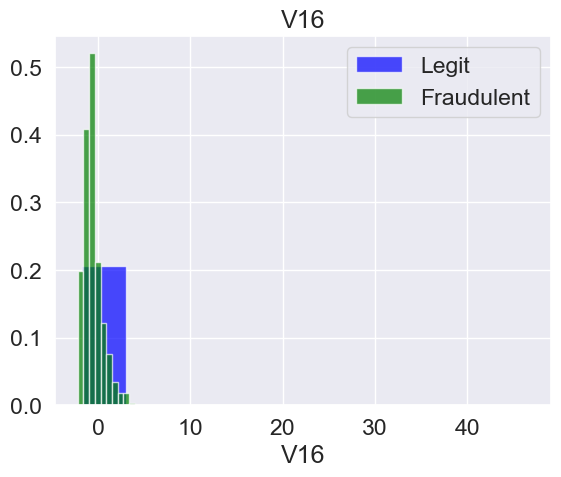

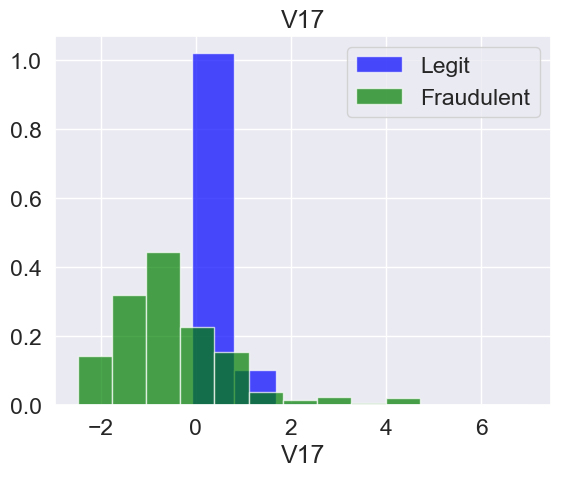

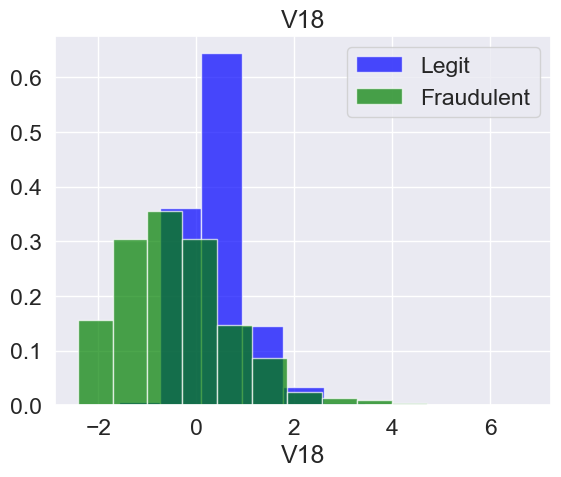

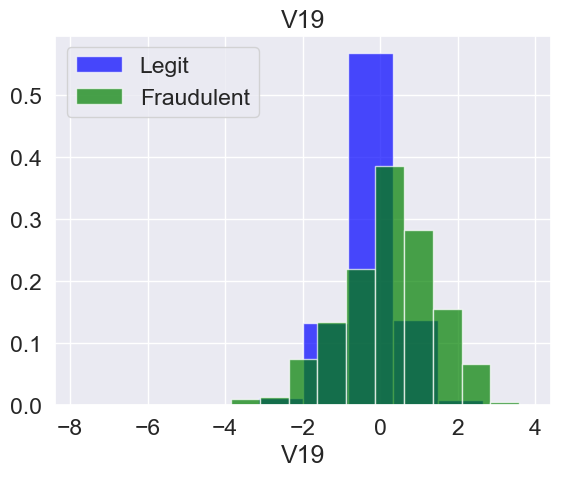

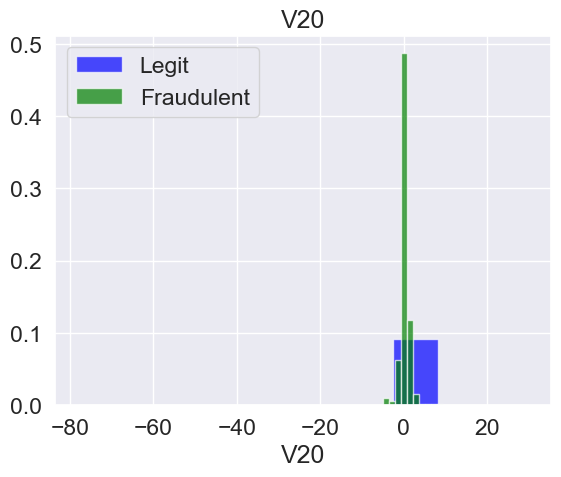

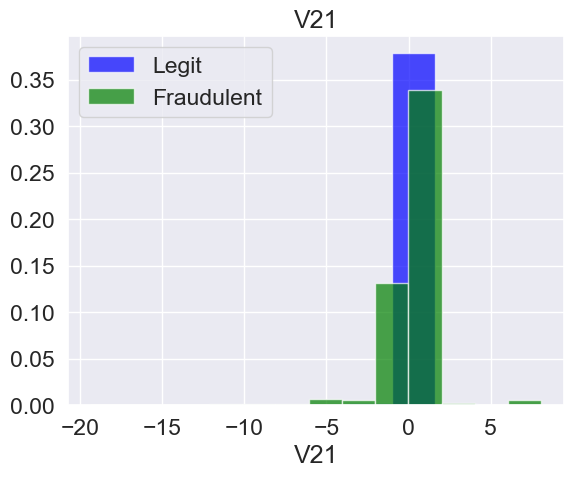

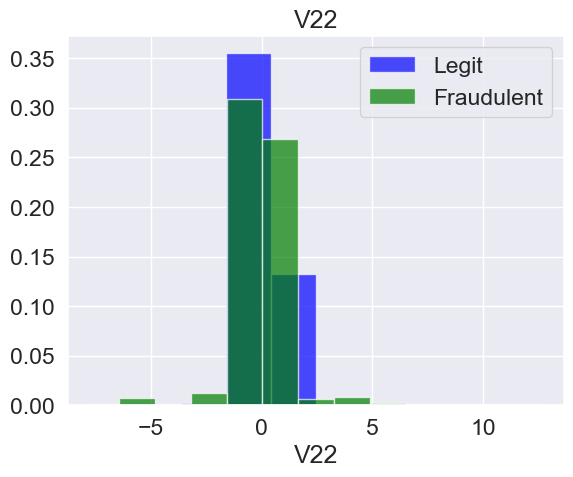

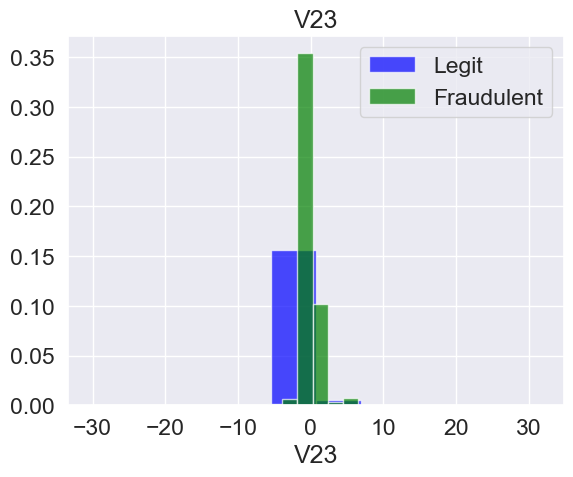

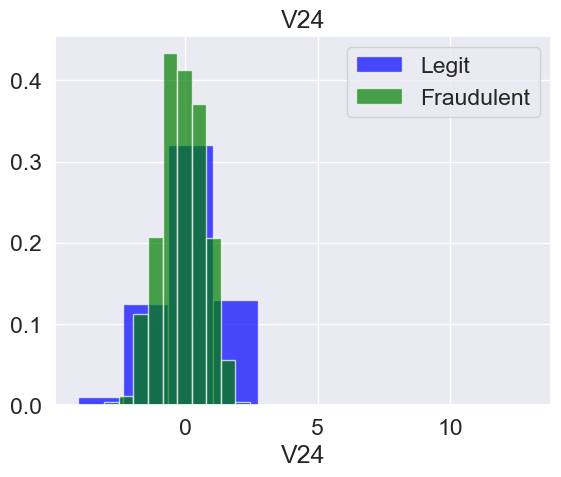

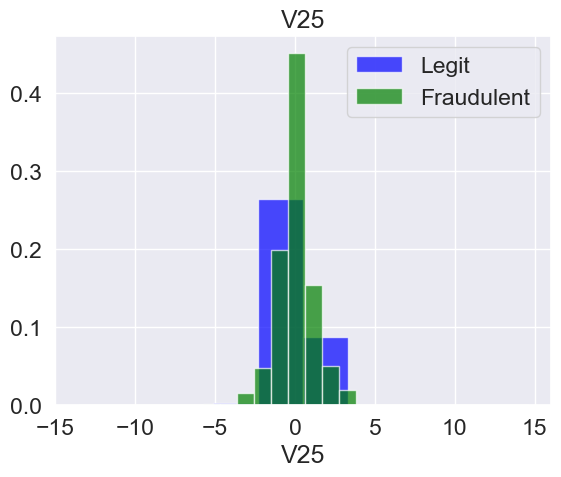

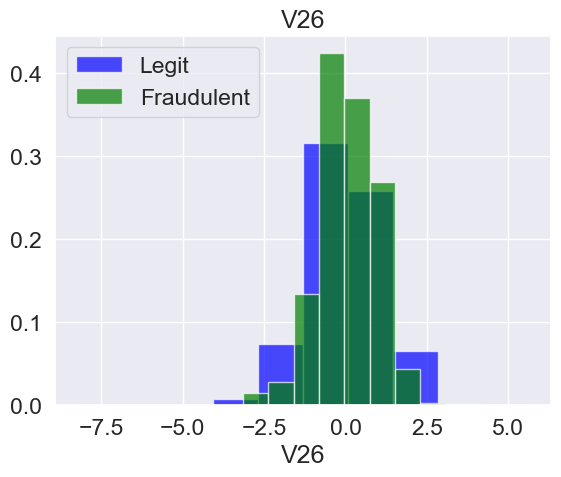

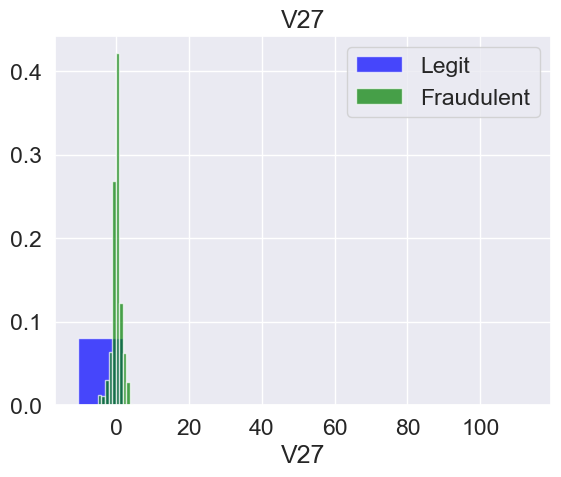

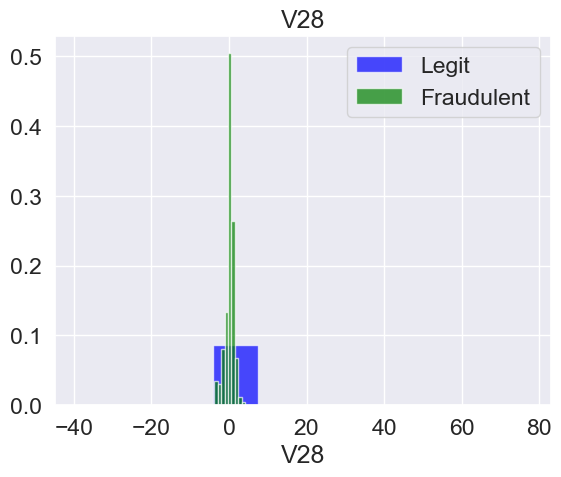

In [192]:
#visualising each column
#histogram visualisation each column with class 0 and 1 
cols = ['V1' , 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']



for label in cols[:-1]:
    plt.hist(credit_data[credit_data['Class']==0][label],color='blue',label='Legit' , alpha=0.7 , density=True)
    plt.hist(credit_data[credit_data['Class']==1][label],color='green',label='Fraudulent' , alpha=0.7 , density=True)
    plt.title(label)
    
    plt.xlabel(label)
    plt.legend()
    plt.show()
    
    

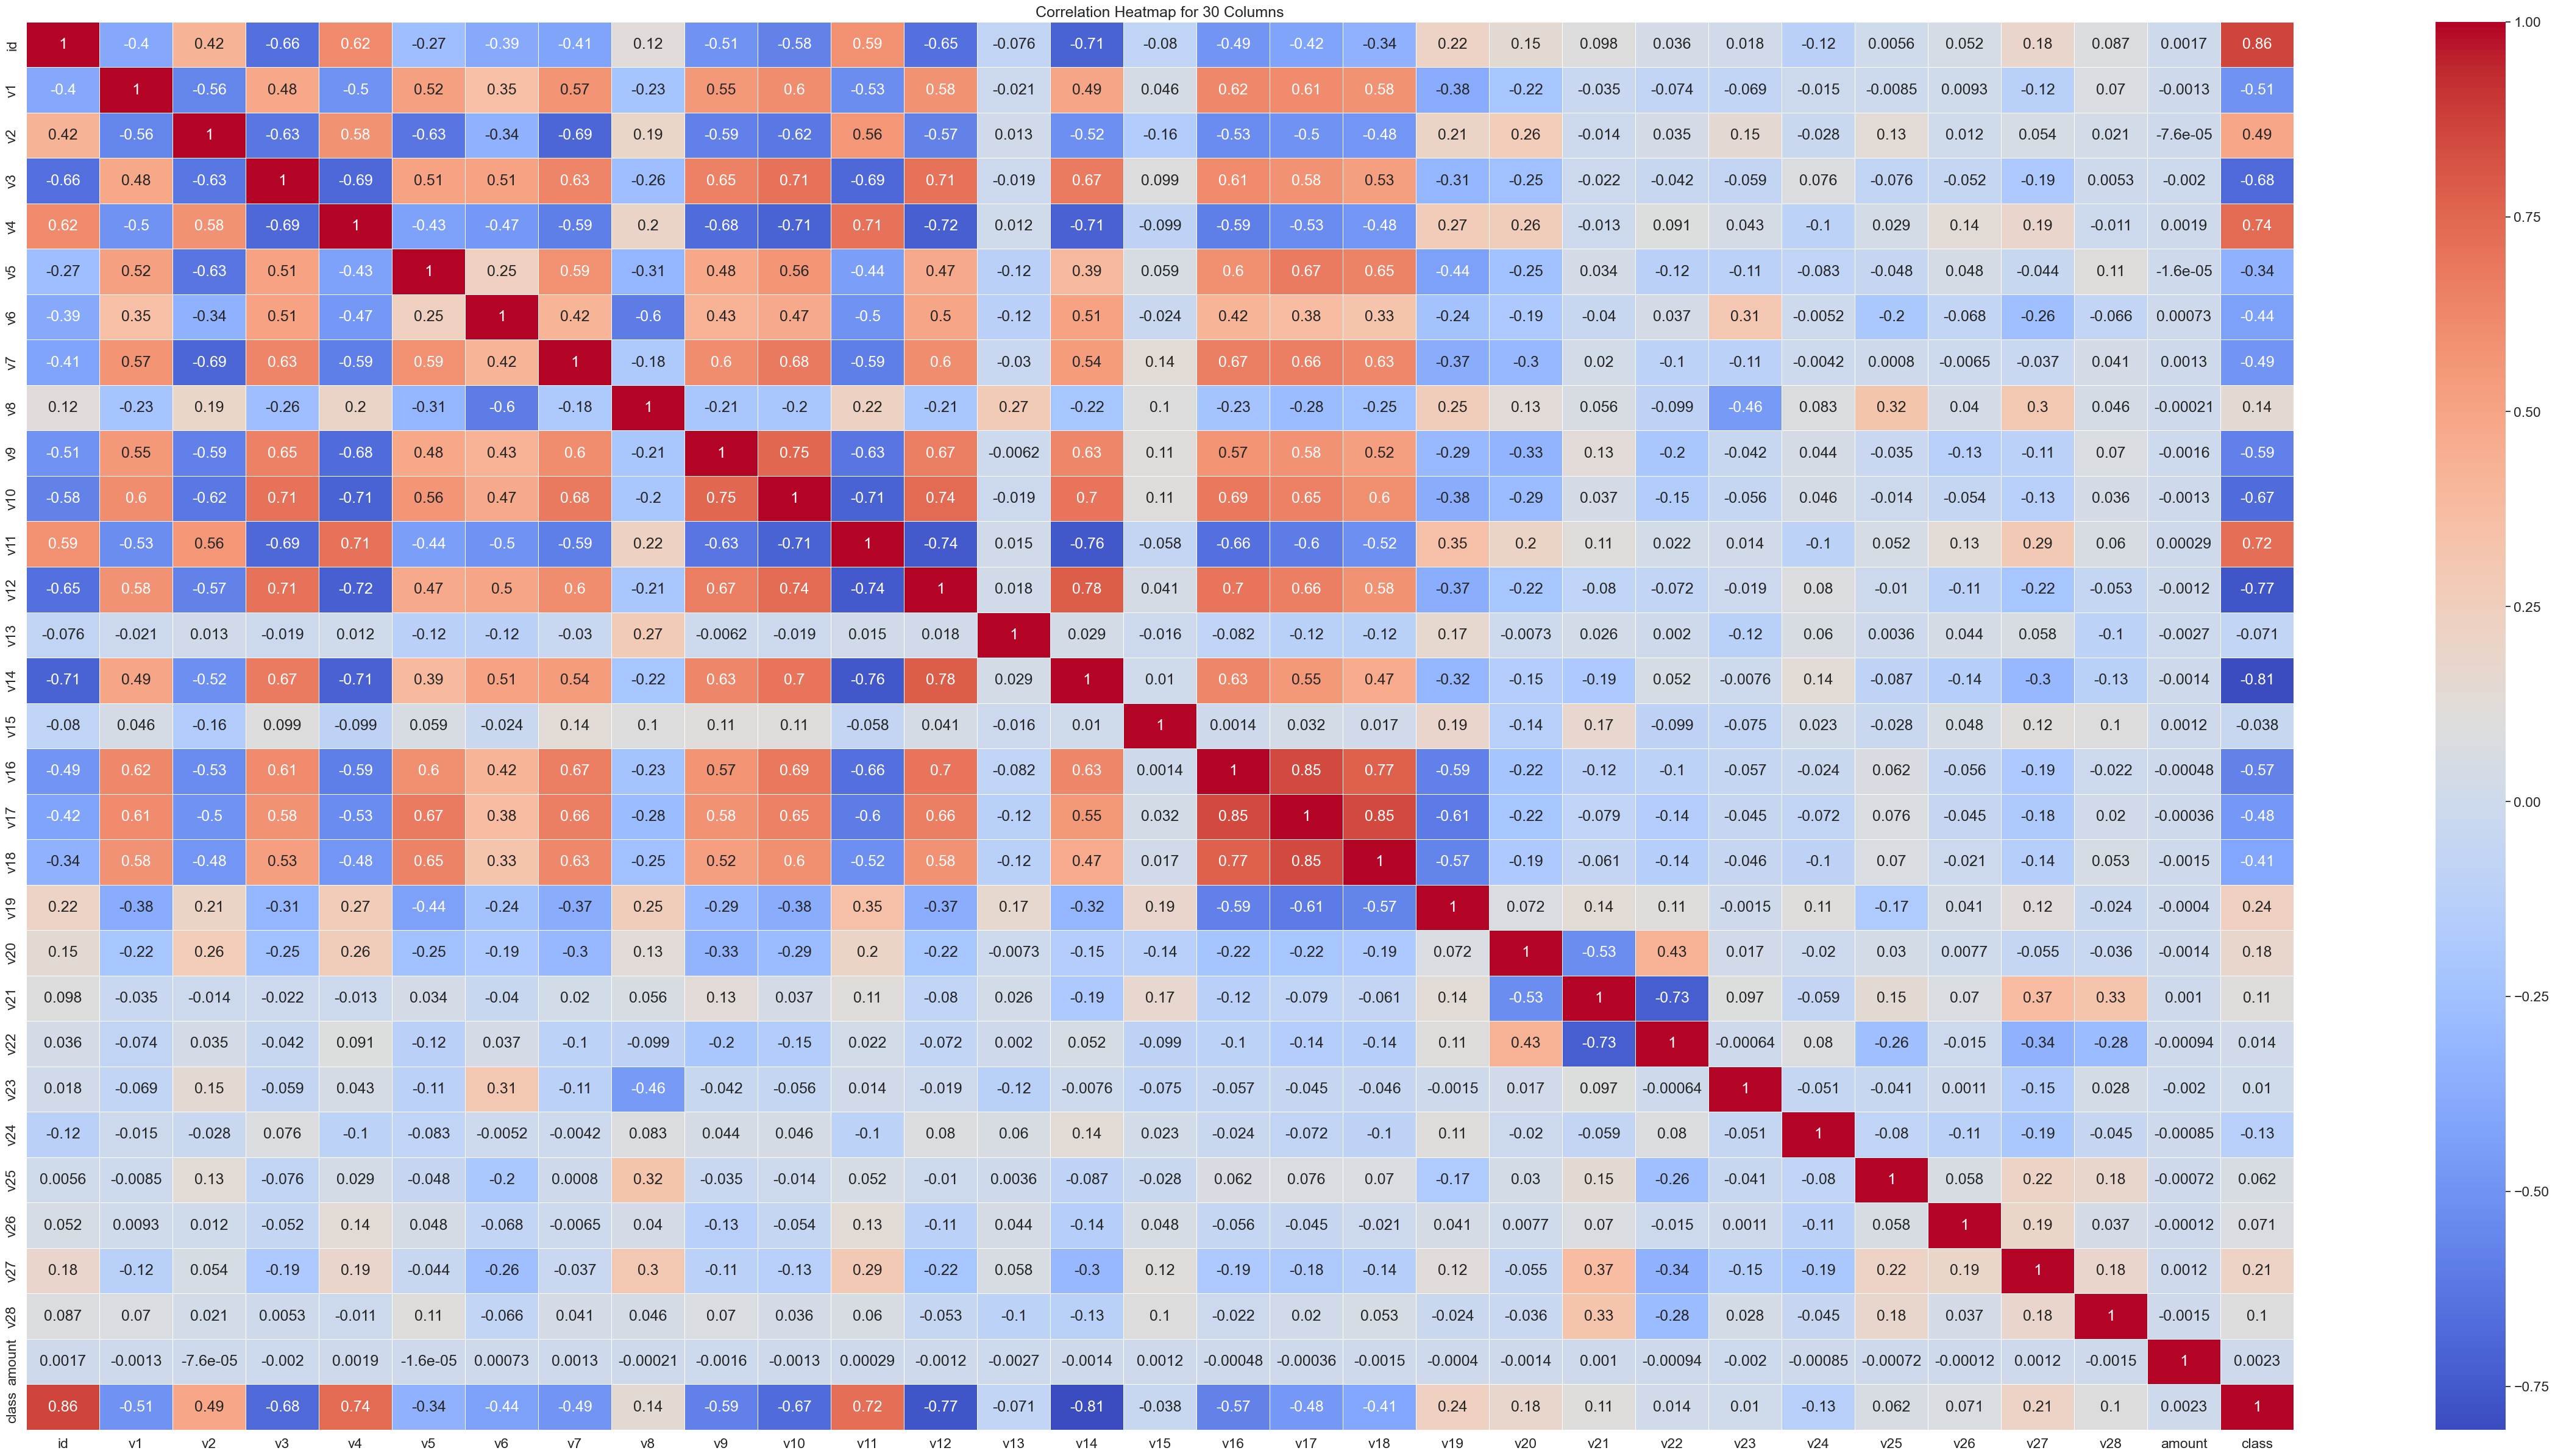

In [193]:
#correlation matrix
#visualising the dataset to find 

# data 
data = {
    'id': credit_data['id'],
    'v1' : credit_data['V1'],
    'v2' : credit_data['V2'],
    'v3' : credit_data['V3'],
    'v4' : credit_data['V4'],
    'v5' : credit_data['V5'],
    'v6' : credit_data['V6'],
    'v7' : credit_data['V7'],
    'v8' : credit_data['V8'],
    'v9' : credit_data['V9'],
    'v10' : credit_data['V10'],
    'v11' : credit_data['V11'],
    'v12' : credit_data['V12'],
    'v13' : credit_data['V13'],
    'v14' : credit_data['V14'],
    'v15' : credit_data['V15'],
    'v16' : credit_data['V16'],
    'v17' : credit_data['V17'],
    'v18' : credit_data['V18'],
    'v19' : credit_data['V19'],
    'v20' : credit_data['V20'],
    'v21' : credit_data['V21'],
    'v22' : credit_data['V22'],
    'v23' : credit_data['V23'],
    'v24' : credit_data['V24'],
    'v25' : credit_data['V25'],
    'v26' : credit_data['V26'],
    'v27' : credit_data['V27'],
    'v28' : credit_data['V28'],
    'amount' : credit_data['Amount'],
    'class' : credit_data['Class']
    
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(60, 30))  # Increase the figure size
sns.set(font_scale=1.5)  # Adjust font size for annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for 30 Columns')
plt.show()

In [194]:
#creating two variable one for storing all features whereas in another it stored only target values ,i.e, 0 and 1
x = credit_data.drop(columns='Class' , axis=1) 

y = credit_data['Class']


In [195]:
#splitting data into train and test
#for splitting data i used sklearn train_test_split method to split data randomly into 70% and 30%

In [196]:
#Here , train_size is 70% and test_size is 30%
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , stratify = y , random_state = 2)
print(x_train.shape , " = X  Train ")
print(x_test.shape , " = X  Test ")
print(y_train.shape, " = Y  Train ")
print(y_test.shape, " = Y  Test ")


(398041, 30)  = X  Train 
(170589, 30)  = X  Test 
(398041,)  = Y  Train 
(170589,)  = Y  Test 


In [197]:
#Model implementation , LogisticRegression

model = LogisticRegression()

model = model.fit(x_train , y_train)


In [198]:
#predicting the model
y_pred = model.predict(x_test)



#Checking accuracy of model to see how accurate does model achieved
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.790771972401503


In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     85295
           1       0.73      0.92      0.81     85294

    accuracy                           0.79    170589
   macro avg       0.81      0.79      0.79    170589
weighted avg       0.81      0.79      0.79    170589



In [ ]:
#For logistic Regression model achieved around 79% accuracy as classification report and accuracy metric score shows

In [170]:
#this perform standardization
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [171]:
x_train

array([[ 1.58638113e-01, -1.66139097e-01,  8.70623254e-01, ...,
         3.63235479e-01,  1.61241676e-02,  1.64254785e+00],
       [ 1.31178468e+00, -3.08168551e-01,  9.44338176e-02, ...,
         1.25129996e-02, -1.17928931e-03,  1.58359325e+00],
       [-1.06080491e+00, -8.05537569e-02, -2.05975105e-01, ...,
         1.50847986e-01,  3.66876066e-01,  4.09950779e-01],
       ...,
       [ 4.58945708e-01, -1.09757688e+00,  5.59901639e-01, ...,
        -7.14865499e-01,  8.31896419e-01,  3.94468059e-01],
       [ 2.08403093e-01, -4.25646744e-01, -1.54328003e-02, ...,
         2.08685058e-01,  3.98141904e-01,  1.39940078e+00],
       [-1.45723749e+00,  9.58583722e-01, -4.10997039e-01, ...,
        -2.60389899e-01, -8.44142383e-02, -1.32146567e+00]])

In [156]:
x_test

array([[-1.68656552,  1.04007195, -0.38663325, ..., -0.34359938,
        -0.08164422,  0.56980042],
       [ 1.08545292, -1.45797029,  1.35843464, ..., -1.50151649,
        -2.69859698,  1.63059173],
       [-0.87853141,  0.80483584, -0.39200367, ..., -0.25807484,
         0.02022036, -0.32194026],
       ...,
       [ 1.19646042, -0.45336744, -0.25905764, ...,  0.21757076,
        -0.25911041, -0.09592314],
       [ 0.93368296,  0.4616401 ,  0.50309607, ...,  0.3674409 ,
         0.65562926,  0.10881677],
       [-1.49522142,  1.02756664, -0.64493638, ..., -0.35195443,
        -0.05129061, -0.25399791]])

In [172]:
#Model Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict 
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9994782782008219


In [ ]:
#model accuracy of Decision Tree shows 99% which very good accuracy result